In [11]:
# Import libraries
import csv
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import warnings
import miscGeneralMethods
import seaborn as sns
import statistics
from scipy import stats

In [12]:
def setConstants():
    global REPLICATES
    global REPOSITORY
    global FILE_FITNESS
    global FILE_DESCRIPTORS
    global VARIABLE_1_PARAMETERS
    global VARIABLE_2_PARAMETERS
    global VARIABLE_1_NAME
    global VARIABLE_2_NAME
    global ROBOTS_NUMBER
    global FITNESS_TARGETS
    global EVALUATIONS
    global FITNESS_STARTING
    global SCALING_VALUES
#     REPOSITORY='/media/edgar/ARE-EBB/ARE/are-logs/mnipes_experiments/'
    REPOSITORY='/media/ebb505/ARE-EBB/ARE/are-logs/mnipes_experiments/'
#     REPLICATES = 10
    REPLICATES = 20
    FILE_FITNESS = 'fitnesses.csv'
    FILE_DESCRIPTORS = 'morph_descriptors.csv'
    VARIABLE_1_NAME = 'Evaluations'
    VARIABLE_2_NAME = 'Time'
    
#     VARIABLE_1_PARAMETERS = ['corridor']
#     FITNESS_TARGETS = [0.92]
#     FITNESS_STARTING = [0.51]
#     SCALING_VALUES = [[0.5,1.0]]

    VARIABLE_1_PARAMETERS = ['exploration']
    FITNESS_TARGETS = [0.27]
    FITNESS_STARTING = [0.0468]
    SCALING_VALUES = [[0,0.396]]

#     VARIABLE_2_PARAMETERS = ['4']
    VARIABLE_2_PARAMETERS = ['4_20']
    ROBOTS_NUMBER = 180
    EVALUATIONS = 40000
    print('Repository: ' + REPOSITORY)
    print('Replicates: ' + str(REPLICATES))
    print('Descriptors: ' + str(FILE_DESCRIPTORS))
    print('File: ' + FILE_FITNESS)

In [13]:
def scale_val(val, mn, mx):
    return (val-mn)/(mx-mn)

def plot_scatter_all(repository_filepath, replicates_number, var1, var2_parameters, data_array, fitness_target, fitness_starting, mn, mx):
    print("Scatter all...")
    fig = plt.figure(facecolor='white')
    plt.title(var1)
    plt.xlabel('Individual robots')
    plt.ylabel('Fitness')
    plt.ylim([0.0,1.0])

    for i in range(len(var2_parameters)):
        data_fitness = []
        for j in range(REPLICATES):
            temp_rep = []
            for k in range(ROBOTS_NUMBER):
                #temp_rep.append(data_array[i][j][k,3])
                temp_rep.append(scale_val(data_array[i][j][k,3], mn, mx))
            plt.scatter(range(0,ROBOTS_NUMBER,1),temp_rep)
    plt.legend(['0','1','2','3','4','5','6','7','8','9','10'],title='replicate')
    plt.plot([0,ROBOTS_NUMBER], [scale_val(fitness_target, mn, mx), scale_val(fitness_target, mn, mx)], 'k', linewidth=2.0)
    plt.text(ROBOTS_NUMBER/2,scale_val(fitness_target, mn, mx),'Target',ha='center',va='bottom')
    plt.plot([0,ROBOTS_NUMBER], [scale_val(fitness_starting, mn, mx), scale_val(fitness_starting, mn, mx)], 'k', linewidth=2.0)
    plt.text(ROBOTS_NUMBER/2,scale_val(fitness_starting, mn, mx),'Starting',ha='center',va='bottom')
    plt.savefig(REPOSITORY + var1 + 'scatter_all.png',dpi=200, bbox_inches='tight')
    plt.close(fig)

def plot_scatter_best(repository_filepath, replicates_number, var1, var2_parameters, data_array, fitness_target, fitness_starting):
    print("Scatter...")
    fig = plt.figure(facecolor='white')
    plt.title(var1)
    plt.xlabel('Individual robots')
    plt.ylabel('Fitness')
    plt.ylim([0.0,1.0])

    for i in range(len(var2_parameters)):
        data_fitness = []
        for j in range(ROBOTS_NUMBER):
            temp_rep = []
            for k in range(REPLICATES):
                temp_rep.append(data_array[i][k][j,3])
            max_fitness = max(temp_rep)
            data_fitness.append(max_fitness)
            #data_fitness.append(data_array[i][j][:ROBOTS_NUMBER,3])
    #     print(data_fitness)    
    plt.scatter(range(0,ROBOTS_NUMBER,1),data_fitness,c="k")
    plt.plot([0,ROBOTS_NUMBER], [fitness_target, fitness_target], 'k', linewidth=2.0)
    plt.text(ROBOTS_NUMBER/2,fitness_target,'Target',ha='center',va='bottom')
    plt.plot([0,ROBOTS_NUMBER], [fitness_starting, fitness_starting], 'k', linewidth=2.0)
    plt.text(ROBOTS_NUMBER/2,fitness_starting,'Starting',ha='center',va='bottom')
    plt.savefig(REPOSITORY + var1 + 'scatter_best.png',dpi=200, bbox_inches='tight')
    plt.close(fig)
def plot_fitness_eval_convergence(repository_filepath, replicates_number, var1, var2_parameters, data_array, fitness_target, fitness_starting):
    fig = plt.figure(facecolor='white')
    plt.title(var1)
    plt.xlabel('Evaluations')
    plt.ylabel('Fitness')
    plt.ylim([0.0,1.0])
    for i in range(len(var2_parameters)):
        temp_exp = []
        for j in range(REPLICATES):
            evaluations = 0
            temp_rep = []
            for k in range(len(data_array[i][j])):
                evaluations = evaluations + data_array[i][j][k,4]
                for robot_evaluations in range(int(data_array[i][j][k,4])):
                    temp_rep.append(data_array[i][j][k,3])
                if(evaluations > EVALUATIONS-1000): # Stop when budget reached
                    break
            temp_exp.append(temp_rep[0:EVALUATIONS-1000:400]) # Otherwise too slow
        array_mean = np.array([[float(y) for y in x] for x in temp_exp])
        df_fitness = pd.DataFrame(array_mean).melt()
        sns.lineplot(x="variable", y="value", data = df_fitness)

    TICKLABEL = range(0,EVALUATIONS-1000,8000)
    TICKPOS =  range(0,len(temp_exp[0]),20)
    plt.xticks(TICKPOS, [str(i) for i in TICKLABEL])
    plt.plot([0,len(temp_exp[0])], [fitness_target, fitness_target], 'k', linewidth=2.0)
    plt.text(len(temp_exp[0])/2,fitness_target,'Target',ha='center',va='bottom')
    plt.plot([0,len(temp_exp[0])], [fitness_starting, fitness_starting], 'k', linewidth=2.0)
    plt.text(len(temp_exp[0])/2,fitness_starting,'Starting',ha='center',va='bottom')
    plt.savefig(REPOSITORY + var1 + 'Evaluationsprogression.png',dpi=200, bbox_inches='tight')
    plt.close(fig)
    
def plot_fitness_convergence(repository_filepath, replicates_number, var1, var2_parameters, data_array, fitness_target, fitness_starting, mn, mx):
    print("Fitness congergence...")
    fig = plt.figure(facecolor='white')
    plt.title(var1)
    plt.xlabel('Individual robots')
    plt.ylabel('Fitness')
    plt.ylim([0.0,1.0])
    
    for i in range(len(var2_parameters)):
        data_fitness = []
        for j in range(REPLICATES):
            temp_robot = []
            for k in range(ROBOTS_NUMBER):
#                 temp_robot.append(data_array[i][j][k,3])
                temp_robot.append(scale_val(data_array[i][j][k,3], mn, mx))
            data_fitness.append(temp_robot)
            #data_fitness.append(data_array[i][j][:ROBOTS_NUMBER,3])
        array_mean = np.array([[float(y) for y in x] for x in data_fitness])
        df_fitness = pd.DataFrame(array_mean).melt()
        sns.lineplot(x="variable", y="value", data = df_fitness)
    plt.plot([0,ROBOTS_NUMBER], [scale_val(fitness_target, mn, mx), scale_val(fitness_target, mn, mx)], 'k', linewidth=2.0)
    plt.text(ROBOTS_NUMBER/2,scale_val(fitness_target, mn, mx),'Target',ha='center',va='bottom')
    plt.plot([0,ROBOTS_NUMBER], [scale_val(fitness_starting, mn, mx), scale_val(fitness_starting, mn, mx)], 'k', linewidth=2.0)
    plt.text(ROBOTS_NUMBER/2,scale_val(fitness_starting, mn, mx),'Starting',ha='center',va='bottom')
    plt.savefig(REPOSITORY + var1 + 'progression.png',dpi=200, bbox_inches='tight')
    plt.close(fig)
    
def plot_descriptors_convergence(repository_filepath, replicates_number, var1, var2_parameters, data_array):
    print("Plotting descriptors convergence...")
    fig = plt.figure(facecolor='white')
    plt.title(var1)
    plt.xlabel('Robots')
    plt.ylabel('Organs number')
    
    for i in range(len(var2_parameters)):
        data_fitness = []
        for j in range(REPLICATES):
            temp_robot = []
            for k in range(ROBOTS_NUMBER):
                temp_robot.append(data_array[i][j][k,5])
            data_fitness.append(temp_robot)
            #data_fitness.append(data_array[i][j][:ROBOTS_NUMBER,5])
        array_mean = np.array([[float(y) for y in x] for x in data_fitness])
        df_fitness = pd.DataFrame(array_mean).melt()
        sns.lineplot(x="variable", y="value", data = df_fitness, label='Wheels')
        
        data_fitness = []
        for j in range(REPLICATES):
            temp_robot = []
            for k in range(ROBOTS_NUMBER):
                temp_robot.append(data_array[i][j][k,6])
            data_fitness.append(temp_robot)
            #data_fitness.append(data_array[i][j][:ROBOTS_NUMBER,6])
        array_mean = np.array([[float(y) for y in x] for x in data_fitness])
        df_fitness = pd.DataFrame(array_mean).melt()
        sns.lineplot(x="variable", y="value", data = df_fitness, label='Sensors')
        
        data_fitness = []
        for j in range(REPLICATES):
            temp_robot = []
            for k in range(ROBOTS_NUMBER):
                temp_robot.append(data_array[i][j][k,7]/2)
            data_fitness.append(temp_robot)
            #data_fitness.append(data_array[i][j][:ROBOTS_NUMBER,7])
        array_mean = np.array([[float(y) for y in x] for x in data_fitness])
        df_fitness = pd.DataFrame(array_mean).melt()
        sns.lineplot(x="variable", y="value", data = df_fitness, label='Legs')
        
        data_fitness = []
        for j in range(REPLICATES):
            temp_robot = []
            for k in range(ROBOTS_NUMBER):
                temp_robot.append(data_array[i][j][k,8])
            data_fitness.append(temp_robot)
            #data_fitness.append(data_array[i][j][:ROBOTS_NUMBER,8])
        array_mean = np.array([[float(y) for y in x] for x in data_fitness])
        df_fitness = pd.DataFrame(array_mean).melt()
        sns.lineplot(x="variable", y="value", data = df_fitness, label='Casters')
    
    TICKPOS =  np.arange(0,1.0-0.0625*3,0.0625)
    TICKLABEL = range(0,13,1)
    plt.yticks(TICKPOS, [str(i) for i in TICKLABEL])
    plt.ylim([0.0,0.4])
    
    plt.legend()
    
    plt.savefig(REPOSITORY + var1 + 'organs.png',dpi=200, bbox_inches='tight')
    plt.close(fig)
    
def plot_descriptors_scatter(repository_filepath, replicates_number, var1, var2_parameters, data_array):

    fig = plt.figure(facecolor='white')
    plt.title(var1)
    plt.xlabel('Robots')
    plt.ylabel('Organs number')
    plt.scatter(np.linspace(0,ROBOTS_NUMBER,ROBOTS_NUMBER),data_array[0][1][:ROBOTS_NUMBER,5])
    plt.scatter(np.linspace(0,ROBOTS_NUMBER,ROBOTS_NUMBER),data_array[0][1][:ROBOTS_NUMBER,6])
    plt.scatter(np.linspace(0,ROBOTS_NUMBER,ROBOTS_NUMBER),data_array[0][1][:ROBOTS_NUMBER,7])    
    
    TICKPOS =  np.arange(0,1.0,0.0625)
    TICKLABEL = range(0,16,1)
    plt.yticks(TICKPOS, [str(i) for i in TICKLABEL])
    plt.ylim([0.0,0.6])
    
    plt.legend(['Wheels', ' Sensors', ' Legs'])
    
    plt.savefig(REPOSITORY + var1 + 'scatter.png',dpi=200, bbox_inches='tight')
    plt.close(fig)    
    
def plot_swarm_rep(repository_filepath, replicates_number, var1,data_fitness, data_descriptors, organType, fitness_target, fitness_starting, mn, mx):
    print("Plotting Swarm...")
    if(organType == 1):
        label = "wheels"
        column = 5
    if(organType == 2):
        label = "sensors"
        column = 6
    if(organType == 3):
        label = "legs"
        column = 7
    if(organType == 4):
        label = "casters"
        column = 8
    list_descriptors = []
    list_fitness = []
    for i in range(replicates_number):
        #list_fitness.extend(data_fitness[0][i][:ROBOTS_NUMBER,3])
        list_fitness.extend(scale_val(data_fitness[0][i][:ROBOTS_NUMBER,3], mn, mx))
        list_descriptors.extend(data_descriptors[0][i][:ROBOTS_NUMBER,column])
    fig = plt.figure(facecolor='white')
    plt.title(var1+'-'+label)
    sns.boxplot(x=list_descriptors, y=list_fitness, whis=np.inf,width=0.95)
#     sns.swarmplot(x=data_descriptors[0][0][:ROBOTS_NUMBER,column],y=data_fitness[0][0][:ROBOTS_NUMBER,3],size=4.0,color="black", edgecolor="black")
    plt.xlabel(label)
    plt.ylabel('Fitness')
    plt.ylim([0.0,1.0])
    TICKPOS =  range(8+1)
    TICKLABEL = range(8+1)
    plt.xticks(TICKPOS, [str(i) for i in TICKLABEL])
    plt.plot([0,8], [scale_val(fitness_target, mn, mx), scale_val(fitness_target, mn, mx)], 'k', linewidth=2.0)
    plt.text(8/2,scale_val(fitness_target, mn, mx),'Target',ha='center',va='bottom')
    plt.plot([0,8], [scale_val(fitness_starting, mn, mx), scale_val(fitness_starting, mn, mx)], 'k', linewidth=2.0)
    plt.text(8/2,scale_val(fitness_starting, mn, mx),'Starting',ha='center',va='bottom')
    plt.savefig(REPOSITORY + var1 + label + 'swarmPlot.png',dpi=200, bbox_inches='tight')
    plt.close(fig)
    
def plot_heatmaps(repository_filepath, replicates_number, var1, data_fitness, data_descriptors, mn, mx):
    print("Plotting heatmaps...")
    
    # Plot the max value for each combination of organs
    organ_comb = [[5,6],[5,7],[5,8],[6,7],[6,8],[7,8]]
    organ_labels = [['wheels','sensors'],['wheels','legs'],['wheels','casters'],['sensors','legs'],['sensors','casters'],['legs','casters']]
    for organ in range(len(organ_comb)):        
        fig = plt.figure(facecolor='white')
        organ_2d_comb = np.zeros((9,9))
        plt.title(var1 + ' - max')
        for i in range(replicates_number):
            for j in range(ROBOTS_NUMBER):
                    if(organ_comb[organ][0] == 7):
                        x = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ][0]]*16 / 2)
                    else:
                        x = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ][0]]*16)
                    if(organ_comb[organ][1] == 7):
                        y = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ][1]]*16 / 2)
                    else:
                        y = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ][1]]*16)
                        
                    if(scale_val(var2_fitness_collection[0][i][j,3], mn, mx) > organ_2d_comb[x,y]):
                        organ_2d_comb[x,y] = round(scale_val(var2_fitness_collection[0][i][j,3], mn, mx),2)
        
        sns.set(font_scale = 1.0)
        ax = sns.heatmap(organ_2d_comb, linewidth=0.5, annot=True,cbar_kws={'label': 'max fitness'})
        ax.set_xlabel(organ_labels[organ][1])
        ax.set_ylabel(organ_labels[organ][0])
        plt.savefig(REPOSITORY + var1 + organ_labels[organ][1] + organ_labels[organ][0] + 'heatmapmaxallrep.png',dpi=200, bbox_inches='tight')
        plt.close(fig)
        
    # Plot heatmap for each replicate
    for organ in range(len(organ_comb)):
        for i in range(replicates_number):
            
            fig = plt.figure(facecolor='white')
            organ_2d_comb = np.zeros((9,9))
            plt.title(var1 + ' - ' + str(i) +  ' - max')
            
            for j in range(ROBOTS_NUMBER):
                    if(organ_comb[organ][0] == 7):
                        x = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ][0]]*16 / 2)
                    else:
                        x = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ][0]]*16)
                    if(organ_comb[organ][1] == 7):
                        y = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ][1]]*16 / 2)
                    else:
                        y = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ][1]]*16)
                        
                    if(scale_val(var2_fitness_collection[0][i][j,3], mn, mx) > organ_2d_comb[x,y]):
                        organ_2d_comb[x,y] = round(scale_val(var2_fitness_collection[0][i][j,3], mn, mx),2)
        
            sns.set(font_scale = 1.0)
            ax = sns.heatmap(organ_2d_comb, linewidth=0.5, annot=True,cbar_kws={'label': 'max fitness'})
            ax.set_xlabel(organ_labels[organ][1])
            ax.set_ylabel(organ_labels[organ][0])
            plt.savefig(REPOSITORY + var1 + organ_labels[organ][1] + organ_labels[organ][0] + str(i) +'heatmapmax.png',dpi=200, bbox_inches='tight')
            plt.close(fig)
            
    # Plot the mean value for each combination of organs
    for organ in range(len(organ_comb)):
        fig = plt.figure(facecolor='white')
#         organ_2d_comb = np.zeros((9,9))
        plt.title(var1 + ' - mean')
        organ_2d_comb_list = []
        for i in range(replicates_number):
            organ_2d_comb_rep = np.zeros((9,9))
            for j in range(ROBOTS_NUMBER):
                    if(organ_comb[organ][0] == 7):
                        x = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ][0]]*16 / 2)
                    else:
                        x = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ][0]]*16)
                    if(organ_comb[organ][1] == 7):
                        y = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ][1]]*16 / 2)
                    else:
                        y = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ][1]]*16)
                        
                    if(scale_val(var2_fitness_collection[0][i][j,3], mn, mx) > organ_2d_comb[x,y]):
                        organ_2d_comb_rep[x,y] = round(scale_val(var2_fitness_collection[0][i][j,3], mn, mx),2)
                        
#                     if(var2_fitness_collection[0][i][j,3] > organ_2d_comb_rep[x,y]):
#                         organ_2d_comb_rep[x,y] = round(var2_fitness_collection[0][i][j,3],2)
            organ_2d_comb_list.append(organ_2d_comb_rep)
    
        organ_2d_comb = np.mean( np.array(organ_2d_comb_list), axis=0 )
#         print(organ_2d_comb)
        sns.set(font_scale = 1.0)
        ax = sns.heatmap(organ_2d_comb, linewidth=0.5, annot=True,cbar_kws={'label': 'max fitness'})
        ax.set_xlabel(organ_labels[organ][1])
        ax.set_ylabel(organ_labels[organ][0])
        plt.savefig(REPOSITORY + var1 + organ_labels[organ][1] + organ_labels[organ][0] + 'heatmapmeanallrep.png',dpi=200, bbox_inches='tight')
        plt.close(fig)
        
        # Plot the mean value for each combination of organs
    for organ in range(len(organ_comb)):
        fig = plt.figure(facecolor='white')
#         organ_2d_comb = np.zeros((9,9))
        plt.title(var1 + ' - median')
        organ_2d_comb_list = []
        for i in range(replicates_number):
            organ_2d_comb_rep = np.zeros((9,9))
            for j in range(ROBOTS_NUMBER):
                    if(organ_comb[organ][0] == 7):
                        x = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ][0]]*16 / 2)
                    else:
                        x = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ][0]]*16)
                    if(organ_comb[organ][1] == 7):
                        y = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ][1]]*16 / 2)
                    else:
                        y = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ][1]]*16)
                        
                    if(scale_val(var2_fitness_collection[0][i][j,3], mn, mx) > organ_2d_comb[x,y]):
                        organ_2d_comb_rep[x,y] = round(scale_val(var2_fitness_collection[0][i][j,3], mn, mx),2)
                        
#                     if(var2_fitness_collection[0][i][j,3] > organ_2d_comb_rep[x,y]):
#                         organ_2d_comb_rep[x,y] = round(var2_fitness_collection[0][i][j,3],2)
            organ_2d_comb_list.append(organ_2d_comb_rep)
    
        organ_2d_comb = np.median( np.array(organ_2d_comb_list), axis=0 )
#         print(organ_2d_comb)
        sns.set(font_scale = 1.0)
        ax = sns.heatmap(organ_2d_comb, linewidth=0.5, annot=True,cbar_kws={'label': 'max fitness'})
        ax.set_xlabel(organ_labels[organ][1])
        ax.set_ylabel(organ_labels[organ][0])
        plt.savefig(REPOSITORY + var1 + organ_labels[organ][1] + organ_labels[organ][0] + 'heatmapmedianallrep.png',dpi=200, bbox_inches='tight')
        plt.close(fig)
        
def plot_trajectories(repository_filepath, replicates_number, var1, robots_number, folders):
    # Fitness file
    trajectories = []
    for i in range(robots_number):
        file_name = 'traj_' + str(i) + '_0'
        list_fitness = miscGeneralMethods.getDataFromFiles(folders, file_name, 0, 0)
        trajectories.append(list_fitness)
    for rep in range(replicates_number):
        fig = plt.figure(facecolor='white')
        plt.title('Trajectories - ' + str(rep))
        plt.xlabel('x (m)')
        plt.ylabel('y (m)')
        plt.ylim([-1.0,1.0])
        plt.xlim([-1.0,1.0])
        alpha_values=np.linspace(0,1,robots_number)
        for robot in range(robots_number):
            list_x = []
            list_y = []
            for waypoint in range(len(trajectories[robot][rep])):
                list_x.append(float(trajectories[robot][rep][waypoint][0]))
                list_y.append(float(trajectories[robot][rep][waypoint][1]))
            plt.plot(list_x,list_y,color='k',alpha=alpha_values[robot])
#         plt.plot([0.55,0.55], [-0.25, 0.25], 'k', linewidth=2.0)
#         plt.plot([-0.625,-0.625], [-0.3, 0.3], 'k', linewidth=2.0)
        plt.savefig(REPOSITORY + var1 + str(rep) + 'trajectories.png',dpi=200, bbox_inches='tight')
        plt.close(fig)

def plot_scatter_ratio(repository_filepath, replicates_number, var1, data_fitness, data_descriptors, mn, mx, fitness_target, fitness_starting):
    r_heat = np.zeros((4,4))
    p_heat = np.zeros((4,4))
    # Plot the max value for each combination of organs
    organ_comb = [[5,6],[5,7],[5,8],[6,7],[6,8],[7,8]]
    organ_labels = [['wheels','sensors'],['wheels','legs'],['wheels','casters'],['sensors','legs'],['sensors','casters'],['legs','casters']]
    # Replicates
    for organ in range(len(organ_comb)):        
        fig = plt.figure(facecolor='white')
        plt.title(var1 + ' all data points')
        data = []
        for i in range(replicates_number):
            for j in range(ROBOTS_NUMBER):
                if(organ_comb[organ][0] == 7):
                    x = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ][0]]*16 / 2)
                else:
                    x = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ][0]]*16)
                if(organ_comb[organ][1] == 7):
                    y = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ][1]]*16 / 2)
                else:
                    y = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ][1]]*16)
                if((x+y) != 0):
                    ratio = x / (x+y)
                    z = scale_val(var2_fitness_collection[0][i][j,3], mn, mx)
                    data.append([ratio, z])
        df = pd.DataFrame(data, columns = ['ratio', 'fitness'])
        plt.scatter(x="ratio", y="fitness", data=df, c='k',s=30.0)
        r, p = stats.pearsonr(df['ratio'], df['fitness'])
        r_heat[organ_comb[organ][0]-5,organ_comb[organ][1]-5] = round(r,2)
        p_heat[organ_comb[organ][0]-5,organ_comb[organ][1]-5] = round(p,2)
        
        r_heat[organ_comb[organ][1]-5,organ_comb[organ][0]-5] = -round(r,2)
        p_heat[organ_comb[organ][1]-5,organ_comb[organ][0]-5] = round(p,2)
        plt.text(1/2,0.9,"r = " + str(round(r,2)) + " p = " + str(round(p,2)),ha='center',va='bottom')
        plt.xlabel(organ_labels[organ][0] + "/(" + organ_labels[organ][0] + "+" + organ_labels[organ][1] + ")")
        plt.ylabel("Fitness")
        plt.xlim([0,1])
        plt.ylim([0,1])
        plt.plot([0,1], [scale_val(fitness_target, mn, mx), scale_val(fitness_target, mn, mx)], 'k', linewidth=2.0)
        plt.text(1/2,scale_val(fitness_target, mn, mx),'Target',ha='center',va='bottom')
        plt.plot([0,1], [scale_val(fitness_starting, mn, mx), scale_val(fitness_starting, mn, mx)], 'k', linewidth=2.0)
        plt.text(1/2,scale_val(fitness_starting, mn, mx),'Starting',ha='center',va='bottom')
        plt.savefig(REPOSITORY + var1 + organ_labels[organ][1] + organ_labels[organ][0]  +  'allDataPointsRatio.png',dpi=200, bbox_inches='tight')
        plt.close(fig)
    
    fig = plt.figure(facecolor='white')
    plt.title(var1 + " - x / (x+y)")
    ax = sns.heatmap(r_heat, linewidth=0.5, annot=True,cbar_kws={'label': 'fitness correlation'},xticklabels=['wheel','sensor','leg','caster'],yticklabels=['wheel','sensor','leg','caster'], vmin=-1.0, vmax=1.0)
    ax.set(xlabel='y', ylabel='x')
    plt.savefig(REPOSITORY + var1 + 'correlation_r.png',dpi=200, bbox_inches='tight')
    plt.close(fig)
    
    fig = plt.figure(facecolor='white')
    plt.title(var1 + " - x / (x+y)")
    ax = sns.heatmap(p_heat, linewidth=0.5, annot=True,cbar_kws={'label': 'p'},xticklabels=['wheel','sensor','leg','caster'],yticklabels=['wheel','sensor','leg','caster'], vmin=0.0, vmax=1.0)
    ax.set(xlabel='y', ylabel='x')
    plt.savefig(REPOSITORY + var1 + 'correlation_p.png',dpi=200, bbox_inches='tight')
    plt.close(fig)
    
    # Plot each replicates
    for organ in range(len(organ_comb)):        
        for i in range(replicates_number):
            fig = plt.figure(facecolor='white')
            plt.title(var1 + ' rep - ' + str(i))
            for j in range(ROBOTS_NUMBER):
                if(organ_comb[organ][0] == 7):
                    x = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ][0]]*16 / 2)
                else:
                    x = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ][0]]*16)
                if(organ_comb[organ][1] == 7):
                    y = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ][1]]*16 / 2)
                else:
                    y = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ][1]]*16)
                if((x+y) != 0):
                    ratio = x / (x+y)
                    z = scale_val(var2_fitness_collection[0][i][j,3], mn, mx)  
                    plt.scatter(ratio,z,c='k',s=30.0)

            plt.xlabel(organ_labels[organ][0] + "/(" + organ_labels[organ][0] + "+" + organ_labels[organ][1] + ")")
            plt.ylabel("Fitness")
            plt.xlim([0,1])
            plt.ylim([0,1])
            plt.plot([0,1], [scale_val(fitness_target, mn, mx), scale_val(fitness_target, mn, mx)], 'k', linewidth=2.0)
            plt.text(1/2,scale_val(fitness_target, mn, mx),'Target',ha='center',va='bottom')
            plt.plot([0,1], [scale_val(fitness_starting, mn, mx), scale_val(fitness_starting, mn, mx)], 'k', linewidth=2.0)
            plt.text(1/2,scale_val(fitness_starting, mn, mx),'Starting',ha='center',va='bottom')
            plt.savefig(REPOSITORY + var1 + organ_labels[organ][1] + organ_labels[organ][0]  + str(i) +  'ratio.png',dpi=200, bbox_inches='tight')
            plt.close(fig)

    # Max across all replicates
    for organ in range(len(organ_comb)):        
        fig = plt.figure(facecolor='white')
        plt.title(var1 + ' - max across all replicates')
        hisdict ={}
        for i in range(replicates_number):
            for j in range(ROBOTS_NUMBER):
                if(organ_comb[organ][0] == 7):
                    x = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ][0]]*16 / 2)
                else:
                    x = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ][0]]*16)
                if(organ_comb[organ][1] == 7):
                    y = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ][1]]*16 / 2)
                else:
                    y = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ][1]]*16)
                if((x+y) != 0):
                    ratio = x / (x+y)
                    z = scale_val(var2_fitness_collection[0][i][j,3], mn, mx)
                    if(ratio in hisdict):
                        if(scale_val(var2_fitness_collection[0][i][j,3], mn, mx) > hisdict[ratio]):
                            hisdict[ratio] = scale_val(var2_fitness_collection[0][i][j,3], mn, mx)
                    else:
                        hisdict[ratio] = scale_val(var2_fitness_collection[0][i][j,3], mn, mx)
        plt.scatter(hisdict.keys(),hisdict.values(),s=30.0,c='k')
        plt.xlabel(organ_labels[organ][0] + "/(" + organ_labels[organ][0] + "+" + organ_labels[organ][1] + ")")
        plt.ylabel("Fitness")
        plt.xlim([0,1])
        plt.ylim([0,1])
        plt.plot([0,1], [scale_val(fitness_target, mn, mx), scale_val(fitness_target, mn, mx)], 'k', linewidth=2.0)
        plt.text(1/2,scale_val(fitness_target, mn, mx),'Target',ha='center',va='bottom')
        plt.plot([0,1], [scale_val(fitness_starting, mn, mx), scale_val(fitness_starting, mn, mx)], 'k', linewidth=2.0)
        plt.text(1/2,scale_val(fitness_starting, mn, mx),'Starting',ha='center',va='bottom')
        plt.savefig(REPOSITORY + var1 + organ_labels[organ][1] + organ_labels[organ][0] + 'ratiomaxallrep.png',dpi=200, bbox_inches='tight')
        plt.close(fig)

    # Max for each replicate
    from matplotlib import cm
    n_colors = replicates_number
    colours = cm.rainbow(np.linspace(0, 1, n_colors))
    for organ in range(len(organ_comb)):        
        fig = plt.figure(facecolor='white')
        plt.title(var1 + ' - max each replicate')

        for i in range(replicates_number):
            hisdict ={}
            for j in range(ROBOTS_NUMBER):
                if(organ_comb[organ][0] == 7):
                    x = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ][0]]*16 / 2)
                else:
                    x = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ][0]]*16)
                if(organ_comb[organ][1] == 7):
                    y = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ][1]]*16 / 2)
                else:
                    y = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ][1]]*16)
                if((x+y) != 0):
                    ratio = x / (x+y)
                    z = scale_val(var2_fitness_collection[0][i][j,3], mn, mx)  
                    if(ratio in hisdict):
                        if(scale_val(var2_fitness_collection[0][i][j,3], mn, mx) > hisdict[ratio]):
                            hisdict[ratio] = scale_val(var2_fitness_collection[0][i][j,3], mn, mx)
                    else:
                        hisdict[ratio] = scale_val(var2_fitness_collection[0][i][j,3], mn, mx)
            plt.scatter(hisdict.keys(),hisdict.values(),s=30.0,c=colours[i].reshape(1,-1),label=str(i))
        plt.xlabel(organ_labels[organ][0] + "/(" + organ_labels[organ][0] + "+" + organ_labels[organ][1] + ")")
        plt.ylabel("Fitness")
        plt.legend()
        plt.xlim([0,1])
        plt.ylim([0,1])
        plt.plot([0,1], [scale_val(fitness_target, mn, mx), scale_val(fitness_target, mn, mx)], 'k', linewidth=2.0)
        plt.text(1/2,scale_val(fitness_target, mn, mx),'Target',ha='center',va='bottom')
        plt.plot([0,1], [scale_val(fitness_starting, mn, mx), scale_val(fitness_starting, mn, mx)], 'k', linewidth=2.0)
        plt.text(1/2,scale_val(fitness_starting, mn, mx),'Starting',ha='center',va='bottom')
        plt.savefig(REPOSITORY + var1 + organ_labels[organ][1] + organ_labels[organ][0] + 'ratiomaxeachrep.png',dpi=200, bbox_inches='tight')
        plt.close(fig)

    #Mean max for each replicate
    for organ in range(len(organ_comb)):        
        fig = plt.figure(facecolor='white')
        plt.title(var1 + ' - highest fitness across all replicates')
        list_dic = []
        for i in range(replicates_number):
            dicrep = {}
            for j in range(ROBOTS_NUMBER):
                if(organ_comb[organ][0] == 7):
                    x = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ][0]]*16 / 2)
                else:
                    x = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ][0]]*16)
                if(organ_comb[organ][1] == 7):
                    y = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ][1]]*16 / 2)
                else:
                    y = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ][1]]*16)
                if((x+y) != 0):
                    ratio = x / (x+y)
                    z = scale_val(var2_fitness_collection[0][i][j,3], mn, mx)  
                    if(ratio in dicrep):
                        if(scale_val(var2_fitness_collection[0][i][j,3], mn, mx) > dicrep[ratio]):
                            dicrep[ratio] = scale_val(var2_fitness_collection[0][i][j,3], mn, mx)
                    else:
                        dicrep[ratio] = scale_val(var2_fitness_collection[0][i][j,3], mn, mx)
            list_dic.append(dicrep)
        diclist ={}
        for i in range(replicates_number):
            for j in range(len(list_dic[i])):
                temp_key = list(list_dic[i])[j]
                if(temp_key in diclist):
                    diclist[temp_key].append(list_dic[i][temp_key])
                else:
                    diclist[temp_key] = []
                    diclist[temp_key].append(list_dic[i][temp_key])
        dicmedian ={}
        dicmax ={}
        dicmin ={}
        for i in range(len(diclist)):
            temp_key = list(diclist)[i]
            dicmedian[temp_key] = np.median(diclist[temp_key])
            dicmax[temp_key] = np.max(diclist[temp_key])
            dicmin[temp_key] = np.min(diclist[temp_key])
        plt.scatter(dicmedian.keys(),dicmedian.values(),s=30.0,c="k", label="median")
        plt.scatter(dicmedian.keys(),dicmax.values(),s=30.0,c="k",marker="+", label="max")
        plt.scatter(dicmedian.keys(),dicmin.values(),s=30.0,c="k",marker="*", label="min")
        plt.xlabel(organ_labels[organ][0] + "/(" + organ_labels[organ][0] + "+" + organ_labels[organ][1] + ")")
        plt.ylabel("Fitness")
        plt.legend()
        plt.xlim([0,1])
        plt.ylim([0,1])
        plt.plot([0,1], [scale_val(fitness_target, mn, mx), scale_val(fitness_target, mn, mx)], 'k', linewidth=2.0)
        plt.text(1/2,scale_val(fitness_target, mn, mx),'Target',ha='center',va='bottom')
        plt.plot([0,1], [scale_val(fitness_starting, mn, mx), scale_val(fitness_starting, mn, mx)], 'k', linewidth=2.0)
        plt.text(1/2,scale_val(fitness_starting, mn, mx),'Starting',ha='center',va='bottom')
        plt.savefig(REPOSITORY + var1 + organ_labels[organ][1] + organ_labels[organ][0] + 'ratiomaxmeaballrep.png',dpi=200, bbox_inches='tight')
        plt.close(fig) 

def plot_ternary(repository_filepath, replicates_number, var1, data_fitness, data_descriptors, mn, mx):
    organ_comb = [5,6,7]
    organ_labels = ['wheels','sensors','legs']
    import plotly.express as px

    # Each replicates       
    for i in range(replicates_number):
        robots_data = []    
        for j in range(ROBOTS_NUMBER):
            temp_ratios = []
            for organ in range(len(organ_comb)):
                if(organ_comb[organ] == 7):
                    x = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ]]*16/2)
                else:
                    x = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ]]*16)
                temp_ratios.append(x)  
            current_fitness = scale_val(var2_fitness_collection[0][i][j,3], mn, mx)
            dic = {"wheels":temp_ratios[0], "sensors":temp_ratios[1], "legs":temp_ratios[2], "size":int(current_fitness*10), "scaled fitness":current_fitness}
            robots_data.append(dic)
        fig = px.scatter_ternary(robots_data, a="wheels", b="sensors", c="legs", size="size", color="scaled fitness")
        fig.show()
        fig.write_image(file=REPOSITORY + var1 + str(i) +  'ternary.png', format='png')
    #     plt.close(fig)

    # All robots       
    robots_data = []
    for i in range(replicates_number):
        for j in range(ROBOTS_NUMBER):
            temp_ratios = []
            for organ in range(len(organ_comb)):
                if(organ_comb[organ] == 7):
                    x = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ]]*16/2)
                else:
                    x = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ]]*16)
                temp_ratios.append(x)  
            current_fitness = scale_val(var2_fitness_collection[0][i][j,3], mn, mx)
            dic = {"wheels":temp_ratios[0], "sensors":temp_ratios[1], "legs":temp_ratios[2], "size":int(current_fitness*10), "scaled fitness":current_fitness}
            robots_data.append(dic)
    fig = px.scatter_ternary(robots_data, a="wheels", b="sensors", c="legs", size="size", color="scaled fitness")
    fig.show()
    fig.write_image(file=REPOSITORY + var1 +  'ternaryallrobots.png', format='png')
    #     plt.close(fig)

    # Threshold
    for i in range(replicates_number):
        robots_data = []    
        for j in range(ROBOTS_NUMBER):
            temp_ratios = []
            for organ in range(len(organ_comb)):
                if(organ_comb[organ] == 7):
                    x = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ]]*16/2)
                else:
                    x = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ]]*16)
                temp_ratios.append(x)
            current_fitness = scale_val(var2_fitness_collection[0][i][j,3], mn, mx)
            if(current_fitness > FITNESS_TARGETS[0]):
                current_fitness = scale_val(var2_fitness_collection[0][i][j,3], mn, mx)
                dic = {"wheels":temp_ratios[0], "sensors":temp_ratios[1], "legs":temp_ratios[2], "size":int(current_fitness*20)}
                robots_data.append(dic)
    fig = px.scatter_ternary(robots_data, a="wheels", b="sensors", c="legs", size="size")
    fig.show()
    fig.write_image(file=REPOSITORY + var1 +  'ternarythreshold.png', format='png')
    #     plt.close(fig)

#     # Plot animation       
#     i = 3 # Replicate ID
#     robots_data = []    
#     for j in range(ROBOTS_NUMBER):
#         temp_ratios = []
#         for organ in range(len(organ_comb)):
#             if(organ_comb[organ] == 7):
#                 x = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ]]*16/2)
#             else:
#                 x = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ]]*16)
#             temp_ratios.append(x)  
#         current_fitness = scale_val(var2_fitness_collection[0][i][j,3], mn, mx)
#         dic = {"wheels":temp_ratios[0], "sensors":temp_ratios[1], "legs":temp_ratios[2], "size":int(current_fitness*10), "scaled fitness":current_fitness}
#         robots_data.append(dic)
#         fig = px.scatter_ternary(robots_data, a="wheels", b="sensors", c="legs", size="size", color="scaled fitness")
#         fig.show()
#         fig.write_image(file=REPOSITORY + var1 + str(i) + "_" + str(j)  + 'ternary.png', format='png')
#     #     plt.close(fig)

In [14]:
setConstants()

font = {'weight' : 'normal',
                    'size'   : 14.0}
plt.rc('font', **font)

Repository: /media/ebb505/ARE-EBB/ARE/are-logs/mnipes_experiments/
Replicates: 20
Descriptors: morph_descriptors.csv
File: fitnesses.csv


In [17]:
print(REPOSITORY)
var1_fitness_collection = []
var1_morph_descriptors_collection = []
for var1 in VARIABLE_1_PARAMETERS:
    var2_fitness_collection = []
    var2_morph_descriptors_collection = []
    print('\t',var1,'-')
    for var2 in VARIABLE_2_PARAMETERS:
        print('\t\t',var2,'-')
        folders,folderNames = miscGeneralMethods.getDirectories(REPOSITORY + var1 + '/' + var2)
        # Fitness file
        list_fitness = miscGeneralMethods.getDataFromFiles(folders, FILE_FITNESS, 0, 0)
        array_fitness = miscGeneralMethods.transformDataToArray(list_fitness, REPLICATES)
        var2_fitness_collection.append(array_fitness)
        # Morph descriptors file
        list_morph_descriptors = miscGeneralMethods.getDataFromFiles(folders, FILE_DESCRIPTORS, 0, 1)
        array_morph_descriptors = miscGeneralMethods.transformDataToArray(list_morph_descriptors, REPLICATES)
        var2_morph_descriptors_collection.append(array_morph_descriptors)
        
    plot_fitness_convergence(REPOSITORY, REPLICATES, var1, VARIABLE_2_PARAMETERS, var2_fitness_collection, FITNESS_TARGETS[0], FITNESS_STARTING[0], SCALING_VALUES[0][0], SCALING_VALUES[0][1])
#     plot_fitness_eval_convergence(REPOSITORY, REPLICATES, var1, VARIABLE_2_PARAMETERS, var2_fitness_collection, FITNESS_TARGETS[0], FITNESS_STARTING[0])
#     plot_scatter_best(REPOSITORY, REPLICATES, var1, VARIABLE_2_PARAMETERS, var2_fitness_collection, FITNESS_TARGETS[0], FITNESS_STARTING[0])
    plot_scatter_all(REPOSITORY, REPLICATES, var1, VARIABLE_2_PARAMETERS, var2_fitness_collection, FITNESS_TARGETS[0], FITNESS_STARTING[0], SCALING_VALUES[0][0], SCALING_VALUES[0][1])
    plot_descriptors_convergence(REPOSITORY, REPLICATES, var1, VARIABLE_2_PARAMETERS, var2_morph_descriptors_collection)
    plot_descriptors_scatter(REPOSITORY, REPLICATES, var1, VARIABLE_2_PARAMETERS, var2_morph_descriptors_collection)
    plot_swarm_rep(REPOSITORY, REPLICATES, var1, var2_fitness_collection, var2_morph_descriptors_collection, 1, FITNESS_TARGETS[0], FITNESS_STARTING[0], SCALING_VALUES[0][0], SCALING_VALUES[0][1])
    plot_swarm_rep(REPOSITORY, REPLICATES, var1, var2_fitness_collection, var2_morph_descriptors_collection, 2, FITNESS_TARGETS[0], FITNESS_STARTING[0], SCALING_VALUES[0][0], SCALING_VALUES[0][1])
    plot_swarm_rep(REPOSITORY, REPLICATES, var1, var2_fitness_collection, var2_morph_descriptors_collection, 3, FITNESS_TARGETS[0], FITNESS_STARTING[0], SCALING_VALUES[0][0], SCALING_VALUES[0][1])
    plot_swarm_rep(REPOSITORY, REPLICATES, var1, var2_fitness_collection, var2_morph_descriptors_collection, 4, FITNESS_TARGETS[0], FITNESS_STARTING[0], SCALING_VALUES[0][0], SCALING_VALUES[0][1])
    plot_heatmaps(REPOSITORY,REPLICATES,var1,var2_fitness_collection,var2_morph_descriptors_collection, SCALING_VALUES[0][0], SCALING_VALUES[0][1])
    plot_scatter_ratio(REPOSITORY,REPLICATES,var1,var2_fitness_collection,var2_morph_descriptors_collection, SCALING_VALUES[0][0], SCALING_VALUES[0][1], FITNESS_TARGETS[0], FITNESS_STARTING[0])
    plot_trajectories(REPOSITORY,REPLICATES,var1,ROBOTS_NUMBER,folders)
    plot_ternary(REPOSITORY,REPLICATES,var1,var2_fitness_collection,var2_morph_descriptors_collection, SCALING_VALUES[0][0], SCALING_VALUES[0][1])
    var1_fitness_collection.append(var2_fitness_collection)
    var1_morph_descriptors_collection.append(var2_morph_descriptors_collection)

/media/ebb505/ARE-EBB/ARE/are-logs/mnipes_experiments/
	 exploration -
		 4_20 -
Getting directories...
--- Folders:  20
Getting data from files...
Transform data to array...
Getting data from files...
Transform data to array...


In [16]:
# Plot the max value for each combination of organs
replicates_number = REPLICATES
# replicates_number = 1
mn = SCALING_VALUES[0][0]
mx = SCALING_VALUES[0][1]
organ_comb = [5,6,7]
organ_labels = ['wheels','sensors','legs']
import plotly.express as px

# Replicates       
for i in range(replicates_number):
    robots_data = []    
    for j in range(ROBOTS_NUMBER):
        temp_ratios = []
        for organ in range(len(organ_comb)):
            if(organ_comb[organ] == 7):
                x = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ]]*16/2)
            else:
                x = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ]]*16)
            temp_ratios.append(x)  
        dic = {"wheels":temp_ratios[0], "sensors":temp_ratios[1], "legs":temp_ratios[2]}
        robots_data.append(dic)
    fig = px.scatter_ternary(robots_data, a="wheels", b="sensors", c="legs")        
    fig.show()
#     fig.savefig(REPOSITORY + var1 + str(i) +  'ternary.png',dpi=200, bbox_inches='tight')
    fig.write_image(file=REPOSITORY + var1 + str(i) +  'ternary.png', format='png')
#     plt.savefig(REPOSITORY + var1 + organ_labels[organ][1] + organ_labels[organ][0]  + str(i) +  'ratio.png',dpi=200, bbox_inches='tight')
#     plt.close(fig)

# Replicates       
robots_data = []
for i in range(replicates_number):
    for j in range(ROBOTS_NUMBER):
        temp_ratios = []
        for organ in range(len(organ_comb)):
            if(organ_comb[organ] == 7):
                x = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ]]*16/2)
            else:
                x = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ]]*16)
            temp_ratios.append(x)  
        dic = {"wheels":temp_ratios[0], "sensors":temp_ratios[1], "legs":temp_ratios[2]}
        robots_data.append(dic)
fig = px.scatter_ternary(robots_data, a="wheels", b="sensors", c="legs")        
fig.show()
#     fig.savefig(REPOSITORY + var1 + str(i) +  'ternary.png',dpi=200, bbox_inches='tight')
fig.write_image(file=REPOSITORY + var1 +  'ternaryallrobots.png', format='png')
#     plt.savefig(REPOSITORY + var1 + organ_labels[organ][1] + organ_labels[organ][0]  + str(i) +  'ratio.png',dpi=200, bbox_inches='tight')
#     plt.close(fig)

# Replicates
for i in range(replicates_number):
    robots_data = []    
    for j in range(ROBOTS_NUMBER):
        temp_ratios = []
        for organ in range(len(organ_comb)):
            if(organ_comb[organ] == 7):
                x = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ]]*16/2)
            else:
                x = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ]]*16)
            temp_ratios.append(x)
        current_fitness = scale_val(var2_fitness_collection[0][i][j,3], mn, mx)
        if(current_fitness > 0.5):
            dic = {"wheels":temp_ratios[0], "sensors":temp_ratios[1], "legs":temp_ratios[2], "robot":j}
            robots_data.append(dic)
fig = px.scatter_ternary(robots_data, a="wheels", b="sensors", c="legs")        
fig.show()
#     fig.savefig(REPOSITORY + var1 + str(i) +  'ternary.png',dpi=200, bbox_inches='tight')
fig.write_image(file=REPOSITORY + var1 +  'ternarythreshold.png', format='png')
#     plt.savefig(REPOSITORY + var1 + organ_labels[organ][1] + organ_labels[organ][0]  + str(i) +  'ratio.png',dpi=200, bbox_inches='tight')
#     plt.close(fig)

In [35]:
print("Get hall of fame...")
# Plot the max value for each combination of organs
organ_comb = [[5,6,7,8]]
organ_labels = [['wheels','sensors','legs','casters']]
best_different_robots = []
for organ in range(len(organ_comb)):   
    organs_2d_fitness = np.zeros((9,9,9,9))
    organs_2d_id = np.zeros((9,9,9,9))
    organs_2d_id = organs_2d_id - 1
    organs_2d_rep = np.zeros((9,9,9,9))
    organs_2d_rep = organs_2d_rep - 1
    
    for i in range(REPLICATES):
        for j in range(ROBOTS_NUMBER):
                w = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ][0]]*16)
                x = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ][1]]*16)
                y = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ][2]]*16 / 2)
                z = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ][3]]*16)
            
                if(round(var2_fitness_collection[0][i][j,3],2) > organs_2d_fitness[w,x,y,z]):
                    organs_2d_fitness[w,x,y,z] = round(var2_fitness_collection[0][i][j,3],2)
                    organs_2d_id[w,x,y,z] =var2_fitness_collection[0][i][j,0]
                    organs_2d_rep[w,x,y,z] = i
                    if(organs_2d_fitness[w,x,y,z] > 0.27): # 0.92 - corridor
                        temp_list = []
                        temp_list.append(i)
                        temp_list.append(var2_fitness_collection[0][i][j,0])
                        temp_list.append(w)
                        temp_list.append(x)
                        temp_list.append(y)
                        temp_list.append(z)
                        temp_list.append(round(var2_fitness_collection[0][i][j,3],2))
                        best_different_robots.append(np.array(temp_list))
#                         print("Rep = " + str(i) +  "\tInd: " + str(var2_fitness_collection[0][i][j,0]) + "\tW = " + str(w) + "\tS = " + str(x) + "\tL = " + str(y) + "\tC = " + str(z) + "\tF = " + str(var2_fitness_collection[0][i][j,3]))
                
# print(best_different_robots)
info = []
for i in range(len(best_different_robots)):
    ind_dist_list = []
    for j in range(len(best_different_robots)):
        if(i != j):
            distance = np.linalg.norm(best_different_robots[i][2:6]-best_different_robots[j][2:6])
#             print(distance)
            ind_dist_list.append(distance)
    mean = np.mean(ind_dist_list)
    best_different_robots[i] = np.append(best_different_robots[i],round(mean,2))
#     print(best_different_robots[i][8]) 
print(len(best_different_robots))    
best_different_robots.sort(key = lambda i: i[7])

# Corridor
# print(best_different_robots[len(best_different_robots)-1][0:8])
# # print(best_different_robots[len(best_different_robots)-2][0:8])
# print(best_different_robots[len(best_different_robots)-3][0:8])
# # print(best_different_robots[len(best_different_robots)-4][0:8])
# print(best_different_robots[len(best_different_robots)-5][0:8])
# # print(best_different_robots[len(best_different_robots)-6][0:8])
# print(best_different_robots[len(best_different_robots)-7][0:8])
# # print(best_different_robots[len(best_different_robots)-8][0:8])
# print(best_different_robots[len(best_different_robots)-9][0:8])
# Exploration
print(best_different_robots[len(best_different_robots)-1][0:8])
print(best_different_robots[len(best_different_robots)-2][0:8])
# print(best_different_robots[len(best_different_robots)-3][0:8])
# print(best_different_robots[len(best_different_robots)-4][0:8])
# print(best_different_robots[len(best_different_robots)-5][0:8])
# print(best_different_robots[len(best_different_robots)-6][0:8])
print(best_different_robots[len(best_different_robots)-7][0:8])
# print(best_different_robots[len(best_different_robots)-8][0:8])
print(best_different_robots[len(best_different_robots)-9][0:8])
# print(best_different_robots[len(best_different_robots)-10][0:8])
print(best_different_robots[len(best_different_robots)-11][0:8])

Get hall of fame...
12
[  4.   142.     0.     0.     4.     3.     0.3    6.55]
[  9.   184.     1.     0.     4.     2.     0.3    5.65]
[  1.   191.     2.     4.     0.     0.     0.31   5.06]
[  0.   177.     7.     0.     0.     0.     0.31   4.68]
[  1.   184.     6.     0.     1.     0.     0.28   4.41]


In [31]:
for i in range(len(folders)):
    print(i, " ", folders[i][67:])

0   mnipes2_15_6_10-8-54-4052-3924049783
1   mnipes2_16_6_10-22-36-6849-242637057
2   mnipes2_16_6_10-22-36-6853-3680087417
3   mnipes2_16_6_10-22-36-6854-2574103584
4   mnipes2_16_6_10-22-36-6872-3516948282
5   mnipes2_16_6_10-22-36-6887-3602145218
6   mnipes2_17_6_9-49-17-7859-3638453920
7   mnipes2_17_6_9-50-40-484-308880315
8   mnipes2_18_6_10-0-39-9331-1478960096
9   mnipes2_20_6_4-0-32-2679-1152637470


['/media/ebb505/ARE-EBB/ARE/are-logs/mnipes_experiments/corridor/4/mnipes2_9_6_0-6-16-6605-3806380686', '/media/ebb505/ARE-EBB/ARE/are-logs/mnipes_experiments/corridor/4/mnipes2_10_6_11-12-5-5202-3894564329', '/media/ebb505/ARE-EBB/ARE/are-logs/mnipes_experiments/corridor/4/mnipes2_10_6_11-12-5-5218-3674135580', '/media/ebb505/ARE-EBB/ARE/are-logs/mnipes_experiments/corridor/4/mnipes2_9_6_0-6-16-6605-3809841399']
Getting data from files...
Getting data from files...
Getting data from files...
File not exist: /media/ebb505/ARE-EBB/ARE/are-logs/mnipes_experiments/corridor/4/mnipes2_9_6_0-6-16-6605-3809841399/traj_2_0
Getting data from files...
Getting data from files...
Getting data from files...
Getting data from files...
Getting data from files...
Getting data from files...
File not exist: /media/ebb505/ARE-EBB/ARE/are-logs/mnipes_experiments/corridor/4/mnipes2_9_6_0-6-16-6605-3806380686/traj_8_0
Getting data from files...
Getting data from files...
Getting data from files...
Getting d

Getting data from files...
Getting data from files...
Getting data from files...
Getting data from files...
Getting data from files...
Getting data from files...
Getting data from files...
Getting data from files...
File not exist: /media/ebb505/ARE-EBB/ARE/are-logs/mnipes_experiments/corridor/4/mnipes2_10_6_11-12-5-5218-3674135580/traj_206_0
Getting data from files...
Getting data from files...
Getting data from files...
File not exist: /media/ebb505/ARE-EBB/ARE/are-logs/mnipes_experiments/corridor/4/mnipes2_9_6_0-6-16-6605-3809841399/traj_209_0
Getting data from files...
Getting data from files...
Getting data from files...
Getting data from files...
Getting data from files...
Getting data from files...
Getting data from files...
Getting data from files...
Getting data from files...
File not exist: /media/ebb505/ARE-EBB/ARE/are-logs/mnipes_experiments/corridor/4/mnipes2_9_6_0-6-16-6605-3806380686/traj_218_0
Getting data from files...
Getting data from files...
Getting data from files

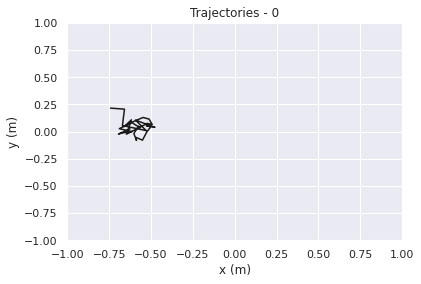

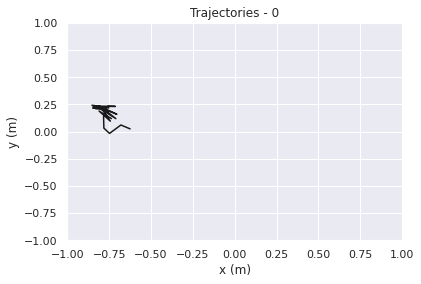

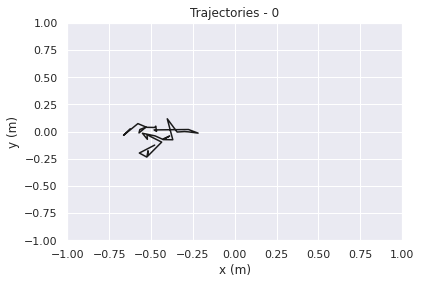

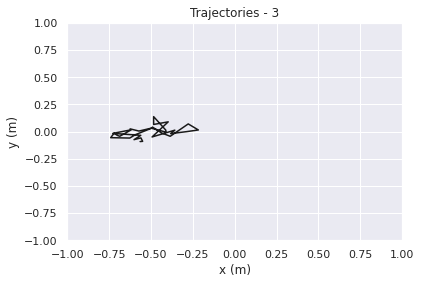

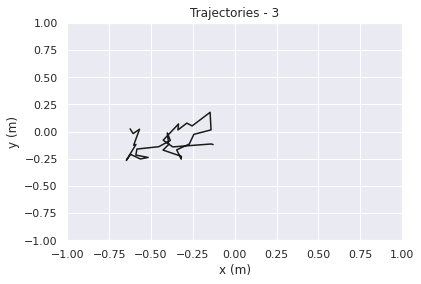

In [84]:

# Fitness file
print(folders)
trajectories = []
for i in range(ROBOTS_NUMBER):
    file_name = 'traj_' + str(i) + '_0'
    list_fitness = miscGeneralMethods.getDataFromFiles(folders, file_name, 0, 0)
    trajectories.append(list_fitness)

for best_robot in range(5):
    robot = int(best_different_robots[len(best_different_robots)-best_robot-1][1])
    rep = int(best_different_robots[len(best_different_robots)-best_robot-1][0])
    
    fig = plt.figure(facecolor='white')
    plt.title('Trajectories - ' + str(rep))
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.ylim([-1.0,1.0])
    plt.xlim([-1.0,1.0])
    
    list_x = []
    list_y = []
    for waypoint in range(len(trajectories[robot][rep])):
        list_x.append(float(trajectories[robot][rep][waypoint][0]))
        list_y.append(float(trajectories[robot][rep][waypoint][1]))
    plt.plot(list_x,list_y,color='k')
    

In [7]:
# Recursive function to get the different lineages
def find_lineage(parent,list_offsprints,temp_lineage,lineages,lst):
    if(parent < len(lst)):
        if(len(list_offsprints[parent]) > 1):
            for i in range(1,len(list_offsprints),1): # Goes through each memeber in the list and finds if child has become a parent
                if(list_offsprints[i][1] == parent):
                    child = int(list_offsprints[i][0])
                    temp_lineage.append(child)
                    lineages = find_lineage(child,list_offsprints,temp_lineage,lineages,lst)
#     print(temp_lineage)
    lineages.append(list(temp_lineage))
    temp_lineage.pop()
    if(parent < len(lst)):
        lst[parent] = 1 # BECAREFUL parent does not match counter
    return lineages
for rep in range(REPLICATES):
    lineages = []
    list_offsprints = var2_fitness_collection[0][rep][:ROBOTS_NUMBER,0:2]
    lst = [0] * len(list_offsprints)
    for i in range(len(list_offsprints)):
        temp_lineage = []
        parent = int(list_offsprints[i][0])
        temp_lineage.append(parent)
        if(parent < len(lst)):
            if(lst[parent] == 0):
                lineages = find_lineage(parent,list_offsprints,temp_lineage,lineages,lst)
    print("Lineages: ", len(lineages))
    print(max(len(x) for x in lineages))

Lineages:  228
17
Lineages:  230
12
Lineages:  229
16
Lineages:  227
17


In [8]:
def get_single_traj(filepath):
    print("Getting single traj")
    print(filepath)
    xs = []; ys=[]
    with open(filepath) as file:
        lines = file.readlines()
        for line in lines:
            str_pos = line.split(';')[0].split(',')
            xs.append(float(str_pos[0]))
            ys.append(float(str_pos[1]))
    return xs, ys
def get_learning_traj(filepath):
    print("Getting learning traj")
    print(filepath)
#     print("Making learning plot for file {} (robot {})".format(filepath,robot_ID))

    ## extract trajectories from files
    xs = [ ]
    ys = [ ]
    fitnesses=[]
    evaluation_numbers=[]
    start_of_trajectory = False
    with open ( filepath ) as file:
        lines = file.readlines ()
        evaluation_number=0
        for line in lines:
            str_pos = line.split ( ';' ) [ 0 ].split ( ',' )
            # we expect the file to take this format:
            # evaluation_1
            # fitnesses;[value];
            # trajectory;
            # [x],[y],0;0,0,0
            # [x],[y],0;0,0,0
            # ...
            # evaluation_2
            # fitnesses;[value];
            # 0.67448;
            # trajectory;
            # [x],[y],0;0,0,0
            # [x],[y],0;0,0,0
            # ...
            if line.startswith("evaluation_"): # new evaluation of this robot
                new_evaluation_number = int( line.split("_")[-1].replace("\n","") )# the "replace" removes newline character
                if new_evaluation_number != evaluation_number+1:
                    print("WARNING evaluation numbers not sequential - {} follows {}".format(new_evaluation_number,evaluation_number))
                evaluation_number = new_evaluation_number
                evaluation_numbers.append(evaluation_number)
                start_of_trajectory=False
                #print("evaluation {}".format(evaluation_number))

            elif line.startswith("fitness"):
                fitnesses.append( float( line.split(";")[-2] ))
                #print("fitness: {}".format(fitnesses[-1]))

            elif line == "trajectory;\n":
                start_of_trajectory = True
                xs.append( [] ) # add new trajectory
                ys.append( [] ) # add new trajectory

            else:
                ## should be a trajectory value
                assert(start_of_trajectory) # check things have happened in the order we expect
                xs[-1 ].append( float( line.split( "," )[0 ] ) )
                ys[-1 ].append( float( line.split( "," )[1 ] ) )

        # find best fitness
        best_fitness_value=0
        best_evaluation_id=[]
        for i,fitness in enumerate(fitnesses):
            if fitness == best_fitness_value:
                best_evaluation_id.append(i)
            elif fitness > best_fitness_value:
                best_fitness_value = fitness
                best_evaluation_id=[i]
        print("best fitness: {}, from evaluation: {}".format(best_fitness_value,best_evaluation_id))
    return xs, ys, fitnesses, best_evaluation_id

In [9]:
robot_library = "/home/ebb505/ARE_Project/robotlibrary/"

task = VARIABLE_1_PARAMETERS[0]

replicate = [9,2]
robot_id = [56,1]
# replicate = [2]
# robot_id = [1]
list_sim_x = []
list_sim_y = []
list_phy_x = []
list_phy_y = []
list_learner_x_random = []
list_learner_y_random = []
list_learner_fitnesses_random = []
list_learner_best_evaluation_id_random = []
list_learner_x_sim = []
list_learner_y_sim = []
list_learner_fitnesses_sim = []
list_learner_best_evaluation_id_sim = []
for i in range(len(replicate)):
    filepath = robot_library + task + "/" + str(replicate[i]) + "_" + str(robot_id[i]) + "/"
    if not os.path.isdir(filepath): 
        print("folder {} does not exist".format(filepath))
    else:
        print(filepath)
        list_of_files = os.listdir(filepath)

    sim_trajectory_filename = "sim_traj_{}".format(robot_id[i])
    sim_to_real_trajectory_filename = "sim_to_real_traj_{}".format(robot_id[i])

    sim_x, sim_y = get_single_traj(filepath+sim_trajectory_filename)
    list_sim_x.append(sim_x)
    list_sim_y.append(sim_y)
    phy_x, phy_y = get_single_traj(filepath+sim_to_real_trajectory_filename)
    list_phy_x.append(phy_x)
    list_phy_y.append(phy_y)
    learner_x, learner_y, learner_fitnesses, learner_best_evaluation_id = get_learning_traj(filepath+"robot_infos_random_{}".format(robot_id[i]))
    list_learner_x_random.append(learner_x)
    list_learner_y_random.append(learner_y)
    list_learner_fitnesses_random.append(learner_fitnesses)
    list_learner_best_evaluation_id_random.append(learner_best_evaluation_id)
    learner_x, learner_y, learner_fitnesses, learner_best_evaluation_id = get_learning_traj(filepath+"robot_infos_sim_{}".format(robot_id[i]))
    list_learner_x_sim.append(learner_x)
    list_learner_y_sim.append(learner_y)
    list_learner_fitnesses_sim.append(learner_fitnesses)
    list_learner_best_evaluation_id_sim.append(learner_best_evaluation_id)


/home/ebb505/ARE_Project/robotlibrary/corridor/9_56/
Getting single traj
/home/ebb505/ARE_Project/robotlibrary/corridor/9_56/sim_traj_56
Getting single traj
/home/ebb505/ARE_Project/robotlibrary/corridor/9_56/sim_to_real_traj_56
Getting learning traj
/home/ebb505/ARE_Project/robotlibrary/corridor/9_56/robot_infos_random_56
WARNING evaluation numbers not sequential - 52 follows 52
best fitness: 0.794393, from evaluation: [30]
Getting learning traj
/home/ebb505/ARE_Project/robotlibrary/corridor/9_56/robot_infos_sim_56
best fitness: 0.775349, from evaluation: [79]
/home/ebb505/ARE_Project/robotlibrary/corridor/2_1/
Getting single traj
/home/ebb505/ARE_Project/robotlibrary/corridor/2_1/sim_traj_1
Getting single traj
/home/ebb505/ARE_Project/robotlibrary/corridor/2_1/sim_to_real_traj_1
Getting learning traj
/home/ebb505/ARE_Project/robotlibrary/corridor/2_1/robot_infos_random_1
best fitness: 0.637618, from evaluation: [5]
Getting learning traj
/home/ebb505/ARE_Project/robotlibrary/corridor/

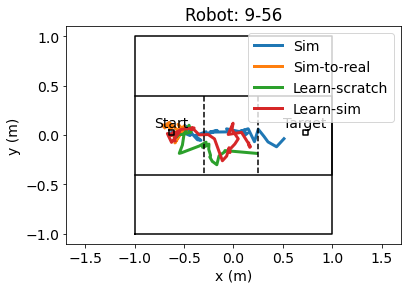

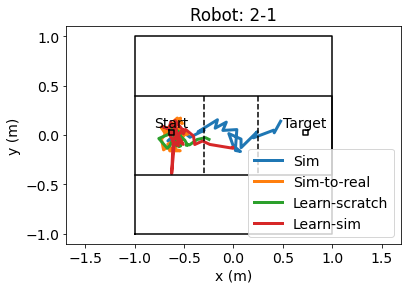

In [10]:
for i in range(len(replicate)):
    fig = plt.figure(facecolor='white')
    plt.gca().axis('equal')
    plt.xlim(-1.1,1.1)
    plt.ylim(-1.1,1.1)
    plt.xlabel("x (m)")
    plt.ylabel("y (m)")
    plt.title("Robot: " + str(replicate[i]) + "-" +str(robot_id[i]))
    plt.plot(list_sim_x[i],list_sim_y[i],linewidth=3)
    plt.plot(list_phy_x[i],list_phy_y[i],linewidth=3)
    plt.plot(list_learner_x_random[i][list_learner_best_evaluation_id_random[i][0]],list_learner_y_random[i][list_learner_best_evaluation_id_random[i][0]],linewidth=3)
    plt.plot(list_learner_x_sim[i][list_learner_best_evaluation_id_sim[i][0]],list_learner_y_sim[i][list_learner_best_evaluation_id_sim[i][0]],linewidth=3)
    plt.plot([-1, 1, 1, -1, -1], [-1, -1, 1, 1, -1], 'k-') # outer walls
    
    plt.plot([-1, 1, 1, -1], [0.4, 0.4, -0.4, -0.4], 'k-') # corridor
    plt.plot([-0.65, -0.6, -0.6, -0.65,-0.65], [0.05, 0.05, 0.0, 0.0,0.05], 'k-') # starting
    plt.text(-0.625,0.05,'Start',ha='center',va='bottom')
    plt.plot([0.75, 0.7, 0.7, 0.75, 0.75], [0.05, 0.05, 0.0, 0.0,0.05], 'k-') # ending
    plt.text(0.725,0.05,'Target',ha='center',va='bottom')
    plt.plot([-0.3, -0.3], [0.4,-0.4], 'k--') # ridge 1
    plt.plot([0.25, 0.25], [0.4,-0.4], 'k--') # ridge 1
    
    plt.legend(["Sim", "Sim-to-real", "Learn-scratch", "Learn-sim"])
    plt.savefig(REPOSITORY + task + str(robot_id[i]) + 'traj.png',dpi=200, bbox_inches='tight')

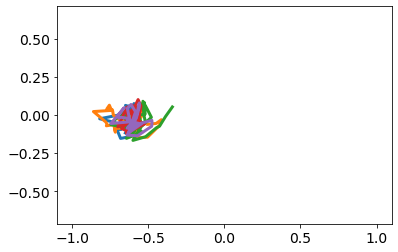

In [12]:
fig = plt.figure(facecolor='white')
plt.gca().axis('equal')
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
for i in range(0,len(learner_x),20):
    plt.plot(learner_x[i],learner_y[i],linewidth=3)

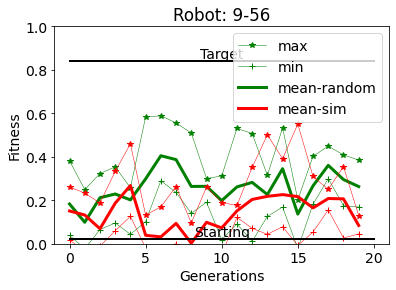

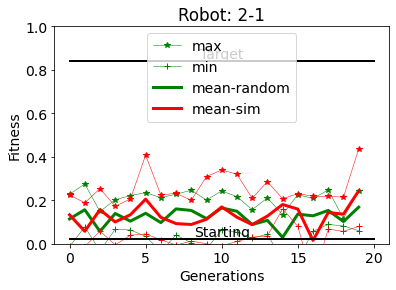

In [11]:
colours = ['r','b']
for i in range(len(replicate)):
    fig = plt.figure(facecolor='white')
    plt.title("Robot: " + str(replicate[i]) + "-" +str(robot_id[i]))
    plt.ylim([0.0,1.0])
    best_vals = []
    mean_vals = []
    min_vals = []
    counter = 0
    for j in range(len(list_learner_fitnesses_random[i])):
        if(counter == 0):
            temp = []
        temp.append(scale_val(list_learner_fitnesses_random[i][j], SCALING_VALUES[0][0], SCALING_VALUES[0][1]))
        counter = counter + 1
        if(counter == 5):
            counter = 0
            best_vals.append(max(temp))
            mean_vals.append(np.mean(temp))
            min_vals.append(min(temp))
    plt.plot(best_vals,linewidth=0.5,marker='*',c="g",label="max")
    plt.plot(min_vals,linewidth=0.5,marker='+',c="g",label="min")
    plt.plot(mean_vals,linewidth=3,c="g",label="mean-random")
    
    best_vals = []
    mean_vals = []
    min_vals = []
    counter = 0
    for j in range(len(list_learner_fitnesses_sim[i])):
        if(counter == 0):
            temp = []
        temp.append(scale_val(list_learner_fitnesses_sim[i][j], SCALING_VALUES[0][0], SCALING_VALUES[0][1]))
        counter = counter + 1
        if(counter == 5):
            counter = 0
            best_vals.append(max(temp))
            mean_vals.append(np.mean(temp))
            min_vals.append(min(temp))
    plt.plot(best_vals,linewidth=0.5,marker='*',c="r")
    plt.plot(mean_vals,linewidth=3,c="r",label="mean-sim")
    plt.plot(min_vals,linewidth=0.5,marker='+',c="r")
    
    plt.xlabel("Generations")
    plt.ylabel("Fitness")
    plt.legend()
    plt.plot([0,20], [scale_val(FITNESS_TARGETS[0], SCALING_VALUES[0][0], SCALING_VALUES[0][1]), scale_val(FITNESS_TARGETS[0], SCALING_VALUES[0][0], SCALING_VALUES[0][1])], 'k', linewidth=2.0)
    plt.text(20/2,scale_val(FITNESS_TARGETS[0], SCALING_VALUES[0][0], SCALING_VALUES[0][1]),'Target',ha='center',va='bottom')
    plt.plot([0,20], [scale_val(FITNESS_STARTING[0], SCALING_VALUES[0][0], SCALING_VALUES[0][1]), scale_val(FITNESS_STARTING[0], SCALING_VALUES[0][0], SCALING_VALUES[0][1])], 'k', linewidth=2.0)
    plt.text(20/2,scale_val(FITNESS_STARTING[0], SCALING_VALUES[0][0], SCALING_VALUES[0][1]),'Starting',ha='center',va='bottom')
    plt.savefig(REPOSITORY + task + str(robot_id[i]) + 'learning.png',dpi=200, bbox_inches='tight')

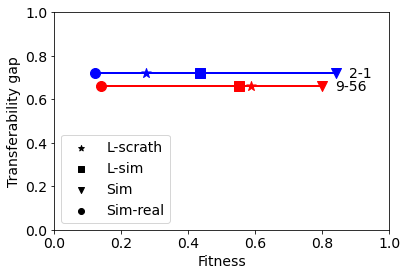

In [12]:
colours = ['r','b']
fig = plt.figure(facecolor='white')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("Transferability gap")
plt.xlabel("Fitness")
sim_fitness = [0.9,0.92]
sim_to_real_fitness = [0.57,0.56]
for i in range(len(replicate)):
    best_random_fitness = list_learner_fitnesses_random[i][list_learner_best_evaluation_id_random[i][0]]
    best_sim_fitness = list_learner_fitnesses_sim[i][list_learner_best_evaluation_id_sim[i][0]]
#     transf = sim_fitness[i] - sim_to_real_fitness[i]
    
    scale_rand_fit = scale_val(best_random_fitness, SCALING_VALUES[0][0], SCALING_VALUES[0][1]) 
    scale_sim_fit = scale_val(best_sim_fitness, SCALING_VALUES[0][0], SCALING_VALUES[0][1])
    scale_sim_sim_fit = scale_val(sim_fitness[i], SCALING_VALUES[0][0], SCALING_VALUES[0][1])
    scale_sim_real_fit = scale_val(sim_to_real_fitness[i], SCALING_VALUES[0][0], SCALING_VALUES[0][1])
    transf = scale_sim_sim_fit - scale_sim_real_fit
    
    plt.scatter(scale_rand_fit, transf, c=colours[i], marker="*",s=100)
    plt.scatter(scale_sim_fit,transf, c=colours[i], marker="s",s=100)
    plt.scatter(scale_sim_sim_fit,transf, c=colours[i], marker="v",s=100)
    plt.scatter(scale_sim_real_fit,transf, c=colours[i],s=100)
    plt.plot([scale_sim_real_fit, scale_rand_fit, scale_sim_fit, scale_sim_sim_fit], [transf,transf,transf,transf], c=colours[i], linewidth=2.0)
    
    plt.text(scale_sim_sim_fit+0.04,transf,str(replicate[i]) + "-" +str(robot_id[i]), va='center', ha='left')
plt.scatter(-1, -1, c='k', marker="*", label="L-scrath")
plt.scatter(-1, -1, c='k', marker="s", label="L-sim")
plt.scatter(-1, -1, c='k', marker="v", label="Sim")
plt.scatter(-1, -1, c='k', label="Sim-real")
plt.legend()
plt.savefig(REPOSITORY + 'hardware-results.png',dpi=200, bbox_inches='tight')